# import hierarchical clustering libraries

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
airlines = pd.read_csv('EastWestAirlines.csv')

In [3]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airlines.dtypes

ID                   int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [6]:
airlines.shape

(3999, 12)

In [7]:
airlines.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

# Normalization Function

In [8]:
def norm_func(i):
    x = (i-i.min()) / (i-i.max())
    return(x)

In [9]:
def_norm = norm_func(airlines.iloc[:,1:])
def_norm.head(15)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.016785,-0.0,-0.000000,-0.0,-0.0,-0.000660,-0.011765,-0.000000,-0.000000,-5.399691,-0.0
1,-0.011417,-0.0,-0.000000,-0.0,-0.0,-0.000816,-0.023810,-0.000000,-0.000000,-5.245482,-0.0
2,-0.024860,-0.0,-0.000000,-0.0,-0.0,-0.015884,-0.048780,-0.000000,-0.000000,-5.572108,-0.0
3,-0.008743,-0.0,-0.000000,-0.0,-0.0,-0.001900,-0.011765,-0.000000,-0.000000,-5.171131,-0.0
4,-0.060826,-0.0,-3.000000,-0.0,-0.0,-0.196474,-0.433333,-0.072269,-0.081633,-5.094048,inf
5,-0.009725,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-5.125554,-0.0
6,-0.052419,-0.0,-1.000000,-0.0,-0.0,-0.116349,-0.409836,-0.000000,-0.000000,-5.370200,-0.0
7,-0.012385,-0.0,-0.000000,-0.0,-0.0,-0.020315,-0.048780,-0.008179,-0.019231,-5.107511,inf
8,-0.351078,-0.0,-1.000000,-1.0,-0.0,-0.006693,-1.000000,-0.142767,-0.292683,-5.152819,inf
9,-0.065538,-0.0,-1.000000,-0.0,-0.0,-0.120829,-0.482759,-0.038764,-0.060000,-5.076190,inf


# KMeans

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airlines.iloc[:,1:])

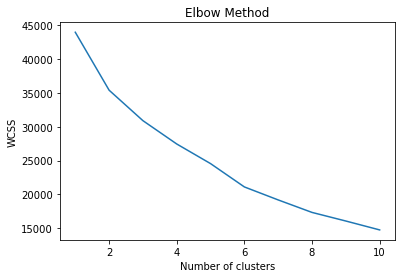

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_airline_df)

KMeans(n_clusters=4, random_state=42)

In [14]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [15]:
## Assign clusters to the data set
airlines['clusterid_new'] = clusters_new.labels_

In [16]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [17]:
airlines.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2245.555073,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1,1731.196532,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,2,1600.001565,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [18]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# DBSCAN

In [19]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
 12  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [21]:
array = airlines.values

In [22]:
array

array([[    1, 28143,     0, ...,  7000,     0,     0],
       [    2, 19244,     0, ...,  6968,     0,     0],
       [    3, 41354,     0, ...,  7034,     0,     0],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     2],
       [ 4020, 54899,     0, ...,  1401,     0,     0],
       [ 4021,  3016,     0, ...,  1398,     0,     0]], dtype=int64)

In [23]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.41925974e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.41925974e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.41925974e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.39719585e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.41925974e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.41925974e-01]])

In [24]:
dbscan = DBSCAN(eps=0.7, min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=7)

In [25]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [26]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,3
3997,0


In [27]:
pd.concat([airlines,cl],axis=1)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0
